In [11]:
import operator 
import csv
import matplotlib.pyplot as plt

In [12]:
raw=[]
data = open('./UIDAI-ENR-DETAIL-20170308/UIDAI-ENR-DETAIL-20170308.csv', 'r')
next(data)

'Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number\n'

In [13]:
for line in data:
    raw.append(line.strip().split(','))
mvkmale={}
mvkfemale={}
mvk={}

In [21]:
for row in raw:
    k=row[3]
    v=row[8]
    if v!='':
        v=int(float(v))
    else:
        v=0
    if k in mvk:
        mvk[k]+=v
    else:
        mvk[k]=v
sorted_d = dict( sorted(mvk.items(), key=lambda x: x[1], reverse=True))
top10={k: sorted_d[k] for k in list(sorted_d)[:10]}

In [22]:
states = []
Aadhaars = []

In [23]:
for key ,value in sorted_d.items():
    states.append(key)
    Aadhaars.append(value)
for row in raw:
    k=row[3]
    v=row[8]
    g=row[6]
    
    if g=="M":
        if v!='':
            v=int(float(v))
        else:
            v=0
        if k in mvkmale:
            mvkmale[k]+=v
        else:
            mvkmale[k]=v
    elif g=="F":
        if v!='':
            v=int(float(v))
        else:
            v=0
        if k in mvkfemale:
            mvkfemale[k]+=v
        else:
            mvkfemale[k]=v

sorted_male = dict( sorted(mvkmale.items(), key=lambda x: x[1], reverse=True))
sorted_female = dict( sorted(mvkfemale.items(), key=lambda x: x[1], reverse=True))

In [24]:
Dist=[]
male=[]
female=[]

In [25]:
for item in top10:
    Dist.append(item)
    male.append(sorted_male[item])
    female.append(sorted_female[item])
    
for i in range(0,10):
    print(Dist[i],male[i],female[i])

South 24 Parganas 7825 8382
Barddhaman 6077 9744
Bhagalpur 11007 3472
North 24 Parganas 5164 6108
Gaya 5959 4796
Katihar 6968 2511
Patna 6191 2754
Murshidabad 6808 1848
Samastipur 6195 2035
Nadia 5509 2653


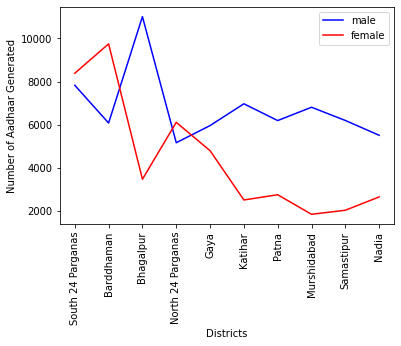

In [30]:
plt.plot(Dist,male,"b",label="male")
plt.plot(Dist,female,"r",label="female")
plt.xticks(rotation=90)
plt.xlabel("Districts")
plt.ylabel("Number of Aadhaar Generated")
plt.legend()
plt.show()